In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf

In [2]:
fb = pd.read_csv("D:/Projects/DataAnalysis/facebook.csv")
ms = pd.read_csv("D:/Projects/DataAnalysis/microsoft.csv")
aapl = pd.read_csv("D:/Projects/DataAnalysis/apple.csv")
housing = pd.read_csv("D:/Projects/DataAnalysis/housing.csv")
eur = pd.read_csv("D:/Projects/DataAnalysis/EURUSD.csv")
gbp = pd.read_csv("D:/Projects/DataAnalysis/GBPUSD.csv")
ixic = pd.read_csv("D:/Projects/DataAnalysis/IXIC.csv")
jpy = pd.read_csv("D:/Projects/DataAnalysis/JPY.csv")
rut = pd.read_csv("D:/Projects/DataAnalysis/RUT.csv")
tnx = pd.read_csv("D:/Projects/DataAnalysis/TNX.csv")
spy = pd.read_csv("D:/Projects/DataAnalysis/SPY.csv")

In [3]:
print(type(ms))
type(fb)

<class 'pandas.core.frame.DataFrame'>


pandas.core.frame.DataFrame

In [4]:
fb.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500
1,2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000
2,2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800
3,2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100
4,2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200


In [5]:
fb.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
fb.shape

(780, 7)

In [7]:
fb.tail(3)

,Date,Open,High,Low,Close,Adj Close,Volume
777,2018-02-01,238.520004,246.899994,238.059998,240.500000,240.500000,12980600
778,2018-02-02,237.000000,237.970001,231.169998,233.520004,233.520004,17961600
779,2018-02-05,227.000000,233.229996,205.000000,213.699997,213.699997,28869000


In [8]:
fb.describe()

,Open,High,Low,Close,Adj Close,Volume
count,780.000000,780.000000,780.000000,780.000000,780.000000,7.800000e+02
mean,80.212705,81.285654,79.022397,80.264897,79.914215,1.204453e+07
std,64.226121,65.048907,63.190963,64.198375,64.327846,8.221848e+06
min,19.250000,19.500000,18.940001,19.139999,18.576082,1.311200e+06
25%,25.525000,26.085000,24.845000,25.475000,25.134512,7.215200e+06
50%,53.379999,54.034999,52.930000,53.420000,53.035403,9.728700e+06
75%,113.322502,115.779999,110.297499,113.702501,113.261238,1.408885e+07
max,245.770004,249.270004,244.449997,246.850006,246.850006,9.232320e+07


<AxesSubplot:>

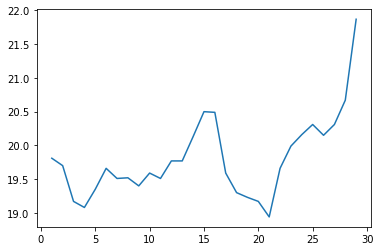

In [9]:
fb.iloc[1:30,3].plot()

In [10]:
fb["Close"]

0       20.049999
1       20.129999
2       19.790001
3       19.190001
4       19.139999
          ...    
775    242.720001
776    245.800003
777    240.500000
778    233.520004
779    213.699997
Name: Close, Length: 780, dtype: float64

In [11]:
fb[["Open","Close"]]

,Open,Close
0,20.400000,20.049999
1,20.129999,20.129999
2,20.129999,19.790001
3,19.820000,19.190001
4,19.330000,19.139999
...,...,...
775,241.110001,242.720001
776,245.770004,245.800003
777,238.520004,240.500000
778,237.000000,233.520004


In [12]:
fb["Close"].shift(-1)

0       20.129999
1       19.790001
2       19.190001
3       19.139999
4       19.860001
          ...    
775    245.800003
776    240.500000
777    233.520004
778    213.699997
779           NaN
Name: Close, Length: 780, dtype: float64

In [13]:
fb["Price1"] = fb["Close"].shift(-1)

In [14]:
fb["PriceDiff"] = fb["Price1"] - fb["Close"]

In [15]:
fb

,Date,Open,High,Low,Close,Adj Close,Volume,Price1,PriceDiff
0,2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,20.129999,0.080000
1,2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,19.790001,-0.339998
2,2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,19.190001,-0.600000
3,2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,19.139999,-0.050002
4,2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,19.860001,0.720002
...,...,...,...,...,...,...,...,...,...
775,2018-01-30,241.110001,246.419998,238.410004,242.720001,242.720001,14270800,245.800003,3.080002
776,2018-01-31,245.770004,249.270004,244.449997,245.800003,245.800003,11964400,240.500000,-5.300003
777,2018-02-01,238.520004,246.899994,238.059998,240.500000,240.500000,12980600,233.520004,-6.979996
778,2018-02-02,237.000000,237.970001,231.169998,233.520004,233.520004,17961600,213.699997,-19.820007


<AxesSubplot:>

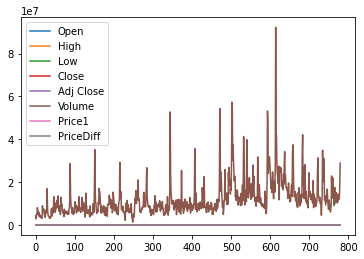

In [16]:
fb.plot()


<AxesSubplot:>

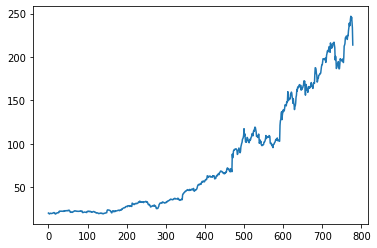

In [17]:
fb["Price1"].plot()

In [18]:
fb.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Price1,PriceDiff
0,2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,20.129999,0.080000
1,2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,19.790001,-0.339998
2,2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,19.190001,-0.600000
3,2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,19.139999,-0.050002
4,2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,19.860001,0.720002


In [19]:
fb["Return"] = fb["PriceDiff"]/fb["Close"]

In [20]:
fb

,Date,Open,High,Low,Close,Adj Close,Volume,Price1,PriceDiff,Return
0,2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,20.129999,0.080000,0.003990
1,2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,19.790001,-0.339998,-0.016890
2,2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,19.190001,-0.600000,-0.030318
3,2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,19.139999,-0.050002,-0.002606
4,2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,19.860001,0.720002,0.037618
...,...,...,...,...,...,...,...,...,...,...
775,2018-01-30,241.110001,246.419998,238.410004,242.720001,242.720001,14270800,245.800003,3.080002,0.012690
776,2018-01-31,245.770004,249.270004,244.449997,245.800003,245.800003,11964400,240.500000,-5.300003,-0.021562
777,2018-02-01,238.520004,246.899994,238.059998,240.500000,240.500000,12980600,233.520004,-6.979996,-0.029023
778,2018-02-02,237.000000,237.970001,231.169998,233.520004,233.520004,17961600,213.699997,-19.820007,-0.084875


In [21]:
fb["Direction"] = [1 if fb.loc[ei,"PriceDiff"] > 0 else -1 for ei in fb.index ]

In [22]:
fb

,Date,Open,High,Low,Close,Adj Close,Volume,Price1,PriceDiff,Return,Direction
0,2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,20.129999,0.080000,0.003990,1
1,2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,19.790001,-0.339998,-0.016890,-1
2,2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,19.190001,-0.600000,-0.030318,-1
3,2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,19.139999,-0.050002,-0.002606,-1
4,2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,19.860001,0.720002,0.037618,1
...,...,...,...,...,...,...,...,...,...,...,...
775,2018-01-30,241.110001,246.419998,238.410004,242.720001,242.720001,14270800,245.800003,3.080002,0.012690,1
776,2018-01-31,245.770004,249.270004,244.449997,245.800003,245.800003,11964400,240.500000,-5.300003,-0.021562,-1
777,2018-02-01,238.520004,246.899994,238.059998,240.500000,240.500000,12980600,233.520004,-6.979996,-0.029023,-1
778,2018-02-02,237.000000,237.970001,231.169998,233.520004,233.520004,17961600,213.699997,-19.820007,-0.084875,-1


In [23]:
fb["Average3"] = (fb["Close"] + fb["Close"].shift(1) + fb["Close"].shift(2)) / 3

In [24]:
fb

,Date,Open,High,Low,Close,Adj Close,Volume,Price1,PriceDiff,Return,Direction,Average3
0,2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,20.129999,0.080000,0.003990,1,NaN
1,2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,19.790001,-0.339998,-0.016890,-1,NaN
2,2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,19.190001,-0.600000,-0.030318,-1,19.990000
3,2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,19.139999,-0.050002,-0.002606,-1,19.703334
4,2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,19.860001,0.720002,0.037618,1,19.373334
...,...,...,...,...,...,...,...,...,...,...,...,...
775,2018-01-30,241.110001,246.419998,238.410004,242.720001,242.720001,14270800,245.800003,3.080002,0.012690,1,244.300003
776,2018-01-31,245.770004,249.270004,244.449997,245.800003,245.800003,11964400,240.500000,-5.300003,-0.021562,-1,245.123337
777,2018-02-01,238.520004,246.899994,238.059998,240.500000,240.500000,12980600,233.520004,-6.979996,-0.029023,-1,243.006668
778,2018-02-02,237.000000,237.970001,231.169998,233.520004,233.520004,17961600,213.699997,-19.820007,-0.084875,-1,239.940002


In [25]:
fb["MA40"] = fb["Close"].rolling(40).mean()
fb["MA200"] = fb["Close"].rolling(200).mean()

<AxesSubplot:>

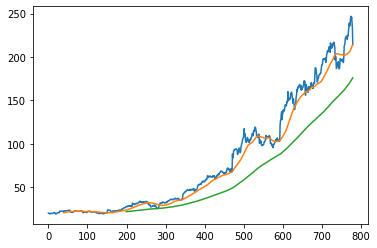

In [26]:
fb["Close"].plot()
fb["MA40"].plot()
fb["MA200"].plot()

In [27]:
ms["MA10"] = ms["Close"].rolling(10).mean()
ms["MA50"] = ms["Close"].rolling(50).mean()

<AxesSubplot:>

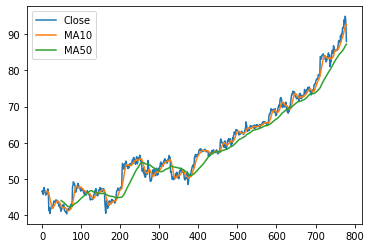

In [28]:
ms["Close"].plot(legend=True)
ms["MA10"].plot(legend=True)
ms["MA50"].plot(legend=True)

In [29]:
ms["Shares"] = [1 if ms.loc[ei,"MA10"] > ms.loc[ei,"MA50"] else 0 for ei in ms.index]

<AxesSubplot:>

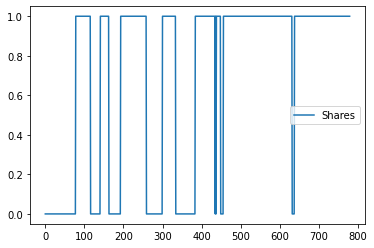

In [30]:
ms["Shares"].plot(legend=True)

In [31]:
ms["Close1"] = ms["Close"].shift(-1)

In [32]:
ms["Profit"] = [ms.loc[ei,"Close1"]-ms.loc[ei,"Close"] if ms.loc[ei,"Shares"] == 1 else 0 for ei in ms.index]

In [33]:
ms["wealth"] = ms["Profit"].cumsum()
ms.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit,wealth
775,2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,91.862,86.5244,1,95.010002,2.270004,30.540009
776,2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,92.349,86.7606,1,94.260002,-0.750000,29.790009
777,2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,92.765,86.9978,1,91.779999,-2.480003,27.310006
778,2018-02-02,93.639999,93.970001,91.500000,91.779999,91.350883,47867800,92.943,87.1828,1,88.000000,-3.779999,23.530007
779,2018-02-05,90.559998,93.239998,88.000000,88.000000,87.588554,51031500,92.582,87.2684,1,NaN,NaN,NaN


In [34]:
ms.index[-2]

778

<AxesSubplot:>

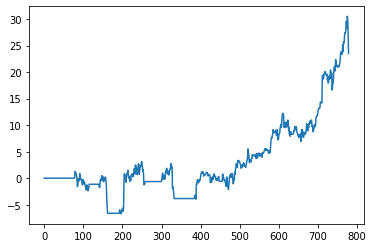

In [35]:
ms["wealth"].plot()

In [36]:
die = pd.DataFrame([1,2,3,4,5,6])
sumofdice = die.sample(2,replace=True).sum().loc[0]
print("Sum of dice is",sumofdice)

Sum of dice is 10


In [37]:
trial = 50
results = [die.sample(2,replace=True).sum().loc[0] for i in range(trial)]
results[0:10]

[5, 8, 11, 6, 4, 7, 4, 9, 7, 7]

In [38]:
die = pd.DataFrame([1,2,3,4,5,6])
sumofdice = die.sample(3,replace=True).sum().loc[0]
print("Sum of three dice is",sumofdice)

Sum of three dice is 13


In [39]:
freq = pd.DataFrame(results)[0].value_counts()
sort_freq = freq.sort_index()
sort_freq

2      1
3      4
4      7
5      4
6      6
7     10
8      6
9      5
10     3
11     3
12     1
Name: 0, dtype: int64

<AxesSubplot:>

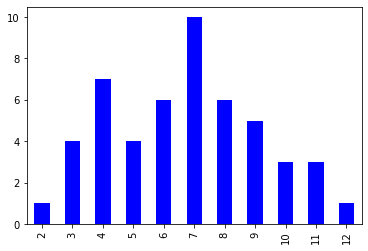

In [40]:
sort_freq.plot(kind="bar",color="blue")

<AxesSubplot:title={'center':'Number of trials'}>

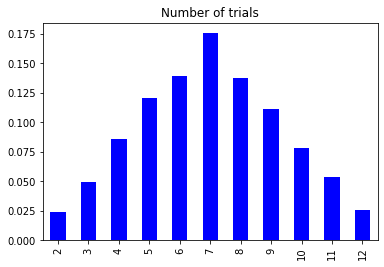

In [41]:
trial = 4000
results = [die.sample(2,replace=True).sum().loc[0] for i in range(trial)]
freq = pd.DataFrame(results)[0].value_counts()
sort_freq = freq.sort_index()
relative_freq = sort_freq/sort_freq.sum()
relative_freq.plot(kind="bar",color="blue",title="Number of trials")

In [42]:
X_distri = pd.DataFrame(index=[2,3,4,5,6,7,8,9,10,11,12])
X_distri["Prob"] = [1,2,3,4,5,6,5,4,3,2,1]
X_distri["Prob"] = X_distri["Prob"]/36

In [43]:
X_distri

,Prob
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


In [44]:
Mean = (X_distri.index*X_distri["Prob"]).sum()
Var = (((X_distri.index-Mean)**2)*X_distri["Prob"]).sum()
print("Mean is:",Mean,"Var is:",Var)

Mean is: 6.999999999999998 Var is: 5.833333333333333


<AxesSubplot:>

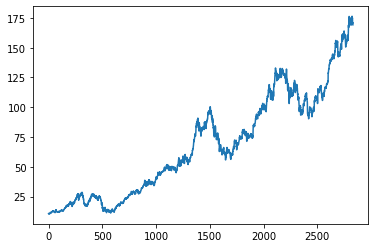

In [45]:
aapl["Close"].plot(legend=False)

In [46]:
aapl["LogReturn"] = np.log(aapl["Close"]).shift(-1) - np.log(aapl["Close"])

0.000975467759150088 0.020045447615854962


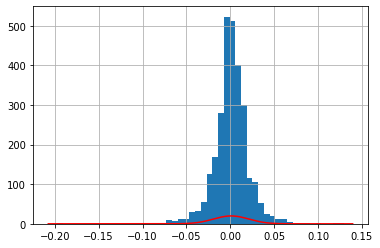

In [47]:
mu = aapl["LogReturn"].mean()
sigma = aapl["LogReturn"].std(ddof=1)
print(mu,sigma)

density = pd.DataFrame()
density["x"] = np.arange(aapl["LogReturn"].min()-0.01,aapl["LogReturn"].max()+0.01,0.001)
density["pdf"] = stats.norm.pdf(density["x"],mu,sigma)

aapl["LogReturn"].hist(bins=50)
plt.plot(density["x"],density["pdf"], color="red")
plt.show()

In [48]:
prob_return1 = stats.norm.cdf(-0.05,mu,sigma)
print("The Probability is ", prob_return1)

The Probability is  0.005495344250959507


In [49]:
prob_return1 = stats.norm.cdf(-0.10,mu,sigma)
print("The Probability is ", prob_return1)

The Probability is  2.3603936652475223e-07


In [50]:
mu220 = 220*mu
sigma220 = (220**0.5) * sigma
print('The probability of dropping over 40% in 220 days is ', stats.norm.cdf(-0.4, mu220, sigma220))

The probability of dropping over 40% in 220 days is  0.019361015454142632


In [51]:
VaR = stats.norm.ppf(0.05,mu,sigma)
print("Single day value at risk",VaR)

Single day value at risk -0.031996359455654697


In [52]:
print("5% quantile",stats.norm.ppf(0.05,mu,sigma))
print("95% quantile",stats.norm.ppf(0.95,mu,sigma))

5% quantile -0.031996359455654697
95% quantile 0.033947294973954864


In [53]:
print("25% quantile",stats.norm.ppf(0.25,mu,sigma))
print("75% quantile",stats.norm.ppf(0.75,mu,sigma))

25% quantile -0.012544981195836568
75% quantile 0.014495916714136742


In [54]:
data = pd.DataFrame()
data["Population"] = [47,48,85,20,19,13,72,16,50,60]
a_sample_without_replacement = data["Population"].sample(5,replace=False)
a_sample_with_replacement = data["Population"].sample(5,replace=True)

In [55]:
a_sample_without_replacement


4    19
3    20
6    72
2    85
7    16
Name: Population, dtype: int64

In [56]:
a_sample_with_replacement

6    72
1    48
2    85
4    19
6    72
Name: Population, dtype: int64

In [57]:
# Parameter - Mean,Variance,Standard Deviation - Static
# Sample - Dynamic
print("Population mean is ",data["Population"].mean())
print("Population variance is ",data["Population"].var(ddof=0))
print("Population standard deviation is ",data["Population"].std(ddof=0))
print("Population size is",data["Population"].shape[0])

Population mean is  43.0
Population variance is  571.8
Population standard deviation is  23.912339910598458
Population size is 10


In [58]:
a_sample = data["Population"].sample(10, replace=True)
print("Sample mean is ",a_sample.mean())
print("Sample variance is ",a_sample.var(ddof=1))
print("Sample standard deviation is ",a_sample.std(ddof=1))
print("Sample size is",a_sample.shape[0])

Sample mean is  43.3
Sample variance is  688.4555555555556
Sample standard deviation is  26.238436606542617
Sample size is 10


In [59]:
sample_length = 500
sample_variance_collection0 = [data["Population"].sample(50,replace=True).var(ddof=0) for i in range(sample_length)]
sample_variance_collection1 = [data["Population"].sample(50,replace=True).var(ddof=1) for i in range(sample_length)]

In [60]:
print("Population variance is ", data["Population"].var(ddof=0))
print("Average of sample variance with n is ", pd.DataFrame(sample_variance_collection0)[0].mean())
print("Average of sample variance with n-1 is ", pd.DataFrame(sample_variance_collection1)[0].mean())


Population variance is  571.8
Average of sample variance with n is  557.9142784
Average of sample variance with n-1 is  567.1757510204081


In [61]:
Fstsample = pd.DataFrame(np.random.normal(10,5,size=30))
print("sample mean is ", Fstsample[0].mean())
print("sample SD is ",Fstsample[0].std(ddof=1))

sample mean is  9.755886872398381
sample SD is  5.1782573767025815


In [62]:
Fstsample

,0
0,9.237042
1,10.923519
2,16.419646
3,11.857076
4,6.215152
5,9.026607
6,9.337946
7,13.006934
8,13.411140
9,7.242692


In [63]:
meanlist = []
varlist = []
for t in range(1000):
    sample = pd.DataFrame(np.random.normal(10,5,size=30))
    meanlist.append(sample[0].mean())
    varlist.append(sample[0].var(ddof=1))

In [64]:
collection = pd.DataFrame()
collection["meanlist"] = meanlist
collection["varlist"] = varlist

<AxesSubplot:>

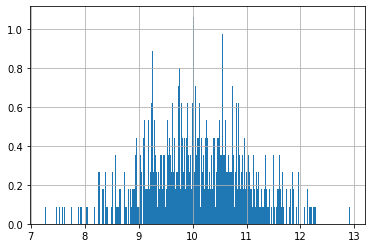

In [65]:
collection["meanlist"].hist(bins=500,density=1)

<AxesSubplot:>

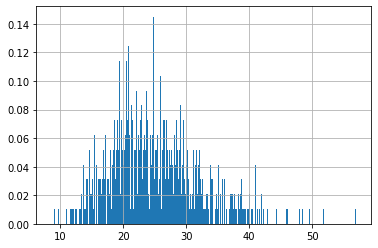

In [66]:
collection["varlist"].hist(bins=500,density=1)

<AxesSubplot:>

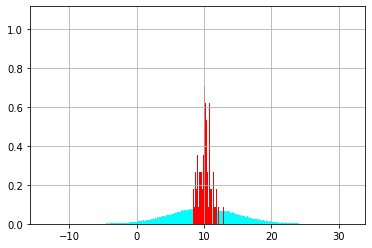

In [67]:
pop = pd.DataFrame(np.random.normal(10,5,size=100000))

pop[0].hist(bins=500,color="cyan",density=1)
collection["meanlist"].hist(bins=500,density=1,color="red")

In [68]:
samplemeanlist = []
apop = pd.DataFrame([1,0,1,0,1])
for t in range(100000):
    sample = apop[0].sample(10,replace=True)
    samplemeanlist.append(sample.mean())

acollec = pd.DataFrame()
acollec["meanlist"] = samplemeanlist

<AxesSubplot:>

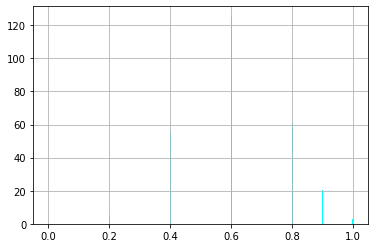

In [69]:
acollec["meanlist"].hist(bins=500,color="cyan",density=1)

In [70]:
samplemeanlist = []
apop = pd.DataFrame([1,0,1,0,1])
for t in range(100000):
    sample = apop[0].sample(2000,replace=True)
    samplemeanlist.append(sample.mean())

acollec = pd.DataFrame()
acollec["meanlist"] = samplemeanlist

<AxesSubplot:>

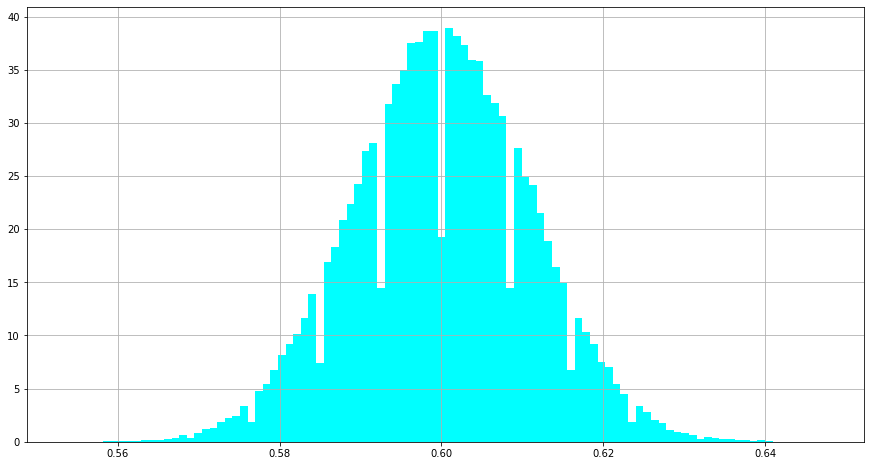

In [71]:
acollec["meanlist"].hist(bins=100,color="cyan",density=1,figsize=(15,8))

In [72]:
# Log Return for Average Stock return
aapl["logReturn"] = np.log(aapl["Close"].shift(-1)) - np.log(aapl["Close"])

<AxesSubplot:>

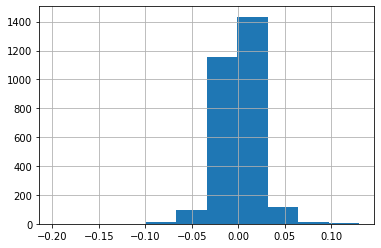

In [73]:
aapl["logReturn"].hist()

In [74]:
z_left = stats.norm.ppf(0.1) # norm.ppf to get quantiles
z_right = stats.norm.ppf(0.9)
sample_mean = aapl["logReturn"].mean() # to get sample mean
sample_std = aapl["logReturn"].std(ddof=1)/(aapl.shape[0])**0.5 # To get sample standard deviation

In [75]:
interval_left = sample_mean + z_left * sample_std
interval_right = sample_mean + z_right * sample_std
print("Sample mean is ", sample_mean)
print("**********************************")
print("80% confidence interval is ")
print(interval_left,interval_right)

Sample mean is  0.000975467759150088
**********************************
80% confidence interval is 
0.0004927367254936755 0.0014581987928065005


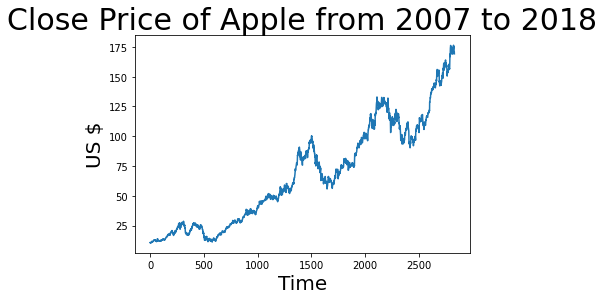

In [76]:
plt.title("Close Price of Apple from 2007 to 2018", size =30)
plt.xlabel("Time", size = 20)
plt.ylabel("US $", size = 20)
plt.plot(aapl.loc[:,"Close"])

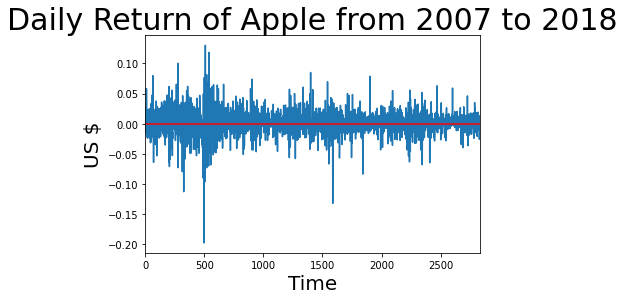

In [77]:
plt.title("Daily Return of Apple from 2007 to 2018", size =30)
plt.xlabel("Time", size = 20)
plt.ylabel("US $", size = 20)
plt.xlim(aapl.index[0],aapl.index[-1])
plt.plot(aapl.loc[:,"logReturn"])
plt.axhline(0,color="red")

<AxesSubplot:title={'center':'Histogram of Daily Return of Apple from 2007 to 2018'}>

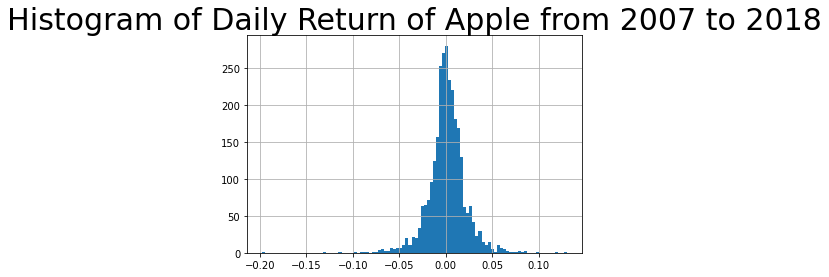

In [78]:
plt.title("Histogram of Daily Return of Apple from 2007 to 2018", size =30)
aapl.loc[:,"logReturn"].dropna().hist(bins=100)

In [79]:
# Null hypothesis H0 u = 0 
# Alternative Hypothesis Ha u != 0 
# Sample based decision - Xbar is u = Not very large
# Start with Null being correct, use t-distribution = tHat
xbar = aapl["logReturn"].mean()
s = aapl["logReturn"].std(ddof=1)
n = aapl["logReturn"].shape[0]
zhat = (xbar-0)/(s/(n**0.5))
print(zhat)
# Because this zhat is far from 0, either between -1.96 and 1.96 then we can reject the null

2.5896661841029576


In [80]:
# There is a 5% chance that we reject the null incorrectly, This is Type 1 error
# If signifcance level is small then the type 1 error is small
alpha = 0.05
zleft = stats.norm.ppf(alpha/2,0,1)
zright = -zleft
print(zleft,zright)
print("At the significance level of ", alpha)
print("Shall we reject?", zhat>zright or zhat<zleft)

-1.9599639845400545 1.9599639845400545
At the significance level of  0.05
Shall we reject? True


In [81]:
# One tail test
# H0 u <= 0 : Null or Ha u > 0 : Alternative
# Reject H0 if zhat is > zAlpha
alpha = 0.05
zright = stats.norm.ppf(1-alpha,0,1)
print(zright)
print("At the significance level of ", alpha)
print("Shall we reject?", zhat>zright)

1.6448536269514722
At the significance level of  0.05
Shall we reject? True


In [82]:
# P-value 
# p value < alpha reject H0
alpha = 0.05
p = 1 - (stats.norm.cdf(abs(zhat),0,1))
print("At the significance level of ",alpha)
print("P-value is ", p)
print("Shall we reject: ", p < alpha)

At the significance level of  0.05
P-value is  0.004803452023053767
Shall we reject:  True


In [83]:
# If Ha: mu not equal 0, it is two tail test and  p-value=2(1-norm.cdf(np.abs(z), 0, 1))
# if Ha: mu>0, it is upper tail test and  p-value=1-norm.cdf(z,0,1)
# if Ha:mu<0, it is lower tail test and  p-value=norm.cdf(z,0,1)

In [84]:
housing.head()

,LSTAT,INDUS,NOX,RM,MEDV
0,4.98,2.31,0.538,6.575,24.0
1,9.14,7.07,0.469,6.421,21.6
2,4.03,7.07,0.469,7.185,34.7
3,2.94,2.18,0.458,6.998,33.4
4,5.33,2.18,0.458,7.147,36.2


In [85]:
housing.cov()

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,50.994760,29.580270,0.488946,-3.079741,-48.447538
INDUS,29.580270,47.064442,0.607074,-1.887957,-30.520823
NOX,0.488946,0.607074,0.013428,-0.024603,-0.455412
RM,-3.079741,-1.887957,-0.024603,0.493671,4.493446
MEDV,-48.447538,-30.520823,-0.455412,4.493446,84.586724


In [86]:
housing.corr()

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,1.000000,0.603800,0.590879,-0.613808,-0.737663
INDUS,0.603800,1.000000,0.763651,-0.391676,-0.483725
NOX,0.590879,0.763651,1.000000,-0.302188,-0.427321
RM,-0.613808,-0.391676,-0.302188,1.000000,0.695360
MEDV,-0.737663,-0.483725,-0.427321,0.695360,1.000000


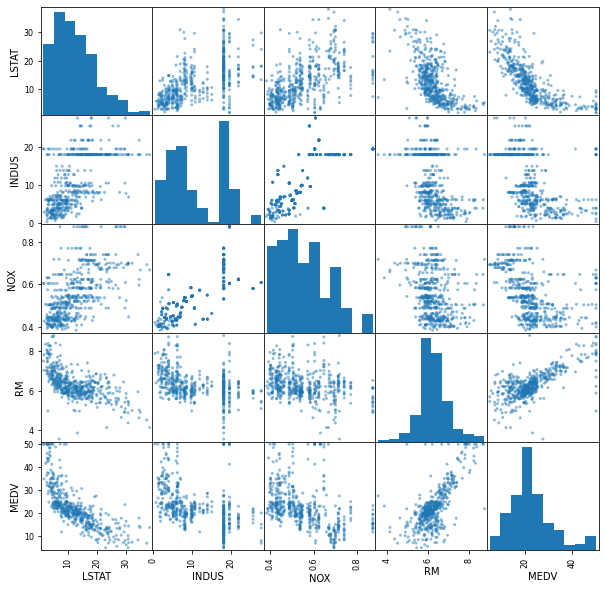

In [87]:
sm = scatter_matrix(housing,figsize = (10,10))

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

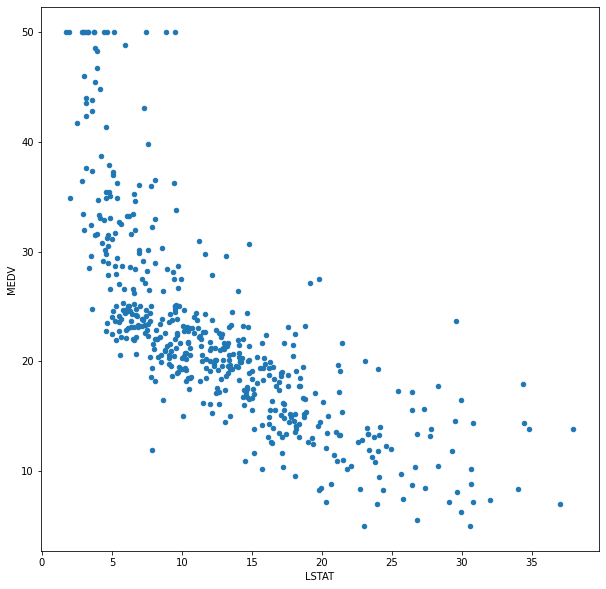

In [88]:
housing.plot(kind = "scatter", x="LSTAT",y="MEDV",figsize=(10,10))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

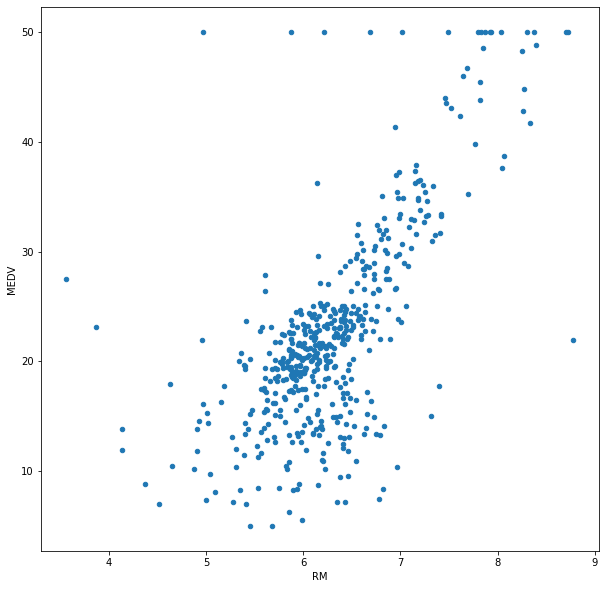

In [89]:
housing.plot(kind = "scatter", x="RM",y="MEDV",figsize=(10,10))

In [90]:
b0 = 0.1
b1 = 1
housing["GuessResponse"] = b0+b1*housing["RM"]

In [91]:
housing["observederror"] = housing["MEDV"] - housing["GuessResponse"]
indices = [7,20,100]
print(housing["observederror"].loc[indices])

7      20.828
20      7.930
100    20.673
Name: observederror, dtype: float64


In [92]:
print("Sum of Squared Errors:", (housing["observederror"]**2).sum())

Sum of Squared Errors: 170373.528047


In [93]:
model = smf.ols(formula = "MEDV~RM",data=housing).fit()
b0_ols = model.params[0]
b1_ols = model.params[1]
housing["BestResponse"] = b0_ols + b1_ols*housing["RM"]
housing.head()

,LSTAT,INDUS,NOX,RM,MEDV,GuessResponse,observederror,BestResponse
0,4.98,2.31,0.538,6.575,24.0,6.675,17.325,25.175746
1,9.14,7.07,0.469,6.421,21.6,6.521,15.079,23.774021
2,4.03,7.07,0.469,7.185,34.7,7.285,27.415,30.728032
3,2.94,2.18,0.458,6.998,33.4,7.098,26.302,29.025938
4,5.33,2.18,0.458,7.147,36.2,7.247,28.953,30.382152


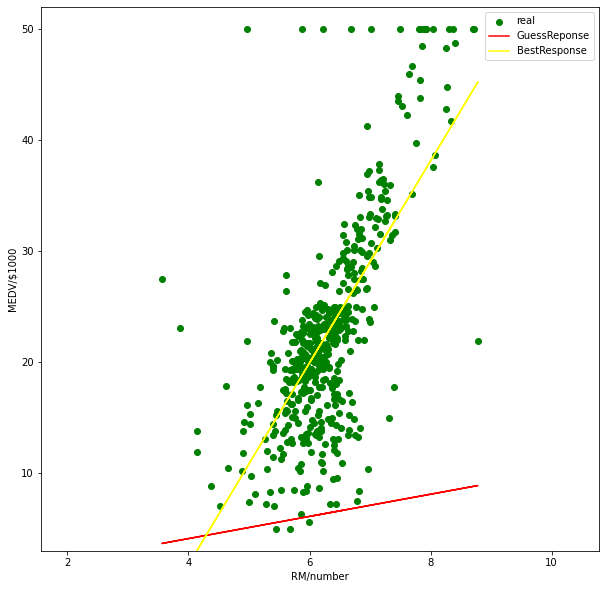

In [94]:
plt.figure(figsize=(10,10))
plt.scatter(housing["RM"],housing["MEDV"],color="g",label="real")
plt.plot(housing["RM"],housing["GuessResponse"],color="red", label="GuessReponse")
plt.plot(housing["RM"],housing["BestResponse"],color="yellow",label="BestResponse")
plt.ylabel("MEDV/$1000")
plt.xlabel("RM/number")
plt.xlim(np.min(housing["RM"])-2,np.max(housing["RM"])+2)
plt.ylim(np.min(housing["MEDV"])-2,np.max(housing["MEDV"])+2)
plt.legend()
plt.show()

In [95]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           2.49e-74
Time:                        17:54:59   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

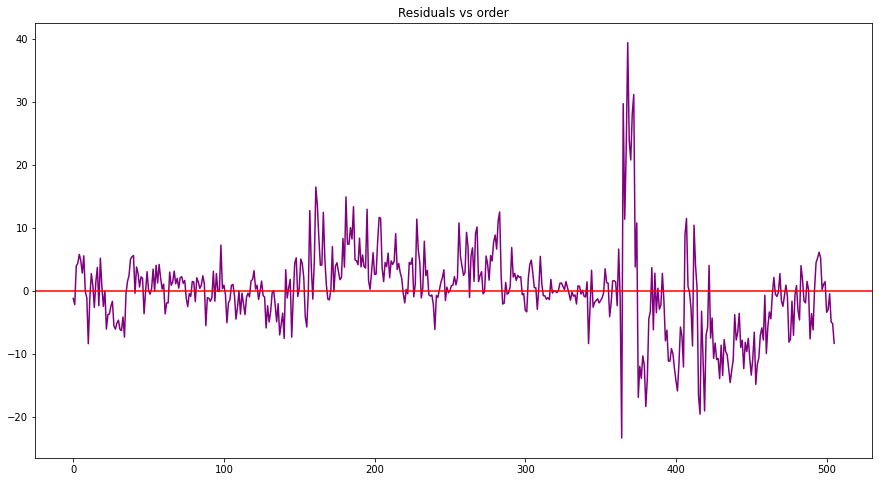

In [96]:
housing["error"] = housing["MEDV"] - housing["BestResponse"]
plt.figure(figsize=(15,8))
plt.title("Residuals vs order")
plt.plot(housing.index,housing["error"],color="purple")
plt.axhline(y=0,color="red")
plt.show()

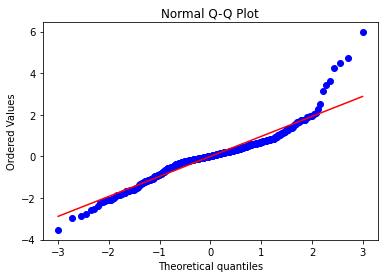

In [97]:
z = (housing["error"]-housing["error"].mean())/housing["error"].std(ddof=1)

stats.probplot(z,dist="norm",plot=plt)
plt.title("Normal Q-Q Plot")
plt.show()

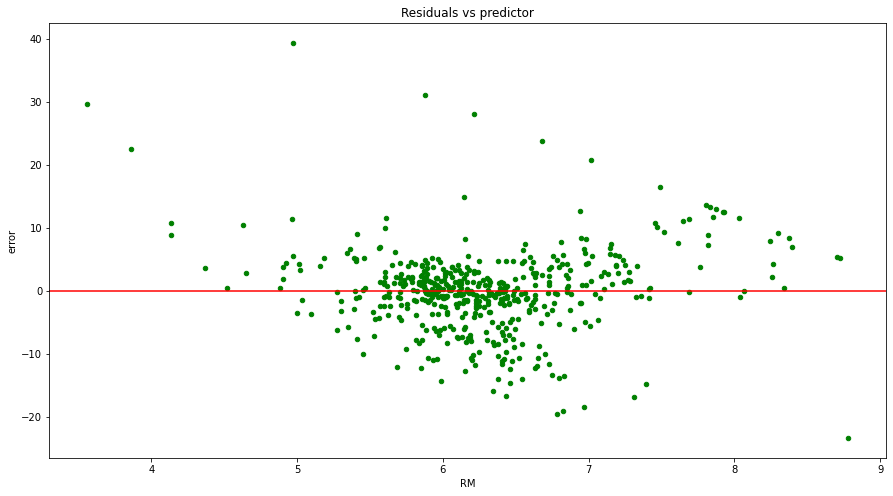

In [98]:
housing.plot(kind="scatter",x="RM",y="error",figsize=(15,8),color="green")
plt.title("Residuals vs predictor")
plt.axhline(y=0,color="red")
plt.show()

In [99]:
eur.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-02-17,1.137333,1.138693,1.132759,1.137527,1.137527,0
1,2022-02-18,1.136389,1.137669,1.131580,1.136648,1.136648,0
2,2022-02-21,1.131734,1.138563,1.131414,1.131721,1.131721,0
3,2022-02-22,1.130966,1.136377,1.128910,1.130966,1.130966,0
4,2022-02-23,1.133055,1.135976,1.130736,1.132913,1.132913,0


In [100]:
# Variable names for csv.
# ixic
# gbp
# eur
# jpy
# rut
# tnx
spy.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-02-17,443.220001,446.570007,436.420013,437.059998,433.832397,102259100
1,2022-02-18,437.329987,438.660004,431.820007,434.230011,431.023285,132642900
2,2022-02-22,431.890015,435.500000,425.859985,429.570007,426.397705,124391800
3,2022-02-23,432.660004,433.260010,421.350006,421.950012,418.833984,132578000
4,2022-02-24,411.019989,428.760010,410.640015,428.299988,425.137085,213942900


In [101]:
indicepanel = pd.DataFrame(index=spy.index)
indicepanel["spy"] = spy["Open"].shift(-1) - spy["Open"]
indicepanel["spy_lag1"] = indicepanel["spy"].shift(1)
indicepanel["ixic"]=ixic["Open"] - ixic["Open"].shift(1)
indicepanel["gbp"] = gbp["Open"] - gbp["Open"].shift(1)
indicepanel["eur"] = eur["Open"] - eur["Open"].shift(1)
indicepanel["jpy"] = jpy["Open"] - jpy["Open"].shift(1)
indicepanel["rut"] = rut["Open"] - rut["Open"].shift(1)
indicepanel["tnx"] = tnx["Open"] - tnx["Open"].shift(1)
indicepanel["Price"] = spy["Open"]

In [102]:
indicepanel.head()

,spy,spy_lag1,ixic,gbp,eur,jpy,rut,tnx,Price
0,-5.890014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.220001
1,-5.439972,-5.890014,-268.790039,0.003310,-0.000944,-0.537994,-50.500000,-0.042,437.329987
2,0.769989,-5.439972,-311.040039,-0.002365,-0.004655,0.099998,-19.319946,NaN,431.890015
3,-21.640015,0.769989,87.389648,0.000348,-0.000768,-0.373001,-27.690064,NaN,432.660004
4,18.589996,-21.640015,-923.870117,-0.000444,0.002089,0.518997,-38.689941,0.037,411.019989


In [103]:
indicepanel= indicepanel.fillna(method="ffill")

In [104]:
indicepanel = indicepanel.dropna()

In [105]:
indicepanel.isnull().sum()

spy         0
spy_lag1    0
ixic        0
gbp         0
eur         0
jpy         0
rut         0
tnx         0
Price       0
dtype: int64

In [106]:
indicepanel.to_csv("D:/Projects/DataAnalysis/indicepanel.csv")

In [107]:
indicepanel.shape

(123, 9)

In [108]:
indicepanel.shape
Train = indicepanel.iloc[-100:-50,:]
Test = indicepanel.iloc[-1000:,:]
print(Train.shape,Test.shape)

(50, 9) (123, 9)


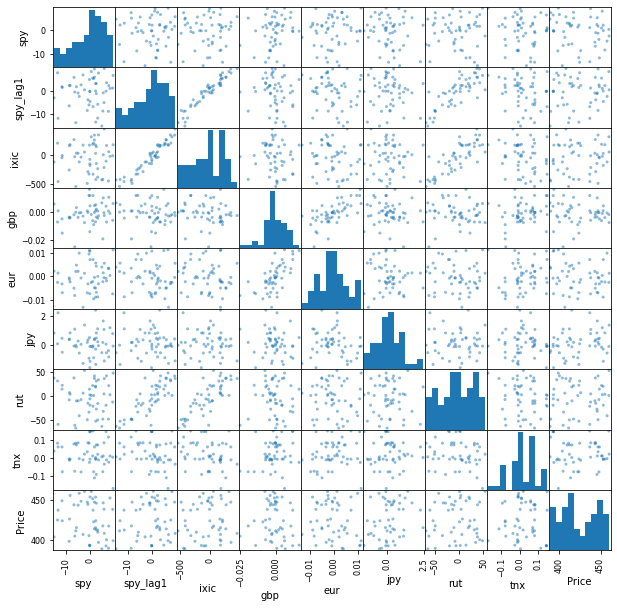

In [109]:
sm = scatter_matrix(Train,figsize=(10,10))

In [110]:
Train.iloc[:,:-1].corr()["spy"]

spy         1.000000
spy_lag1    0.023085
ixic        0.030228
gbp         0.208048
eur         0.109727
jpy        -0.140549
rut        -0.008671
tnx        -0.112066
Name: spy, dtype: float64

In [111]:
formula = "spy~spy_lag1+ixic+gbp+eur+jpy+rut+tnx"
lm = smf.ols(formula=formula,data=Train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    spy   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                 -0.057
Method:                 Least Squares   F-statistic:                    0.6220
Date:                Wed, 17 Aug 2022   Prob (F-statistic):              0.735
Time:                        17:55:03   Log-Likelihood:                -159.46
No. Observations:                  50   AIC:                             334.9
Df Residuals:                      42   BIC:                             350.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0074      0.977      0.008      0.994      -1.965       1.979
spy_lag1       0.0380      0.553      0.069      0.946      -1.078       1.154
ixic           0.0020      0.013      0.150      0.881      -0.025       0.029
gbp          227.0889    157.055      1.446      0.156     -89.862     544.040
eur          -63.0805    209.790     -0.301      0.765    -486.453     360.292
jpy           -0.9110      1.102     -0.826      0.413      -3.136       1.314
rut           -0.0252      0.048     -0.530      0.599      -0.121       0.071
tnx          -14.1655     13.405     -1.057      0.297     -41.218      12.887
==============================================================================
Omnibus:                        2.336   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.311   Jarque-Bera (JB):                1.755
Skew:                          -0.280   Prob(JB):                        0.416
Kurtosis:                       2.273   Cond. No.                     6.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
Train.iloc[:, :-1].corr()

,spy,spy_lag1,ixic,gbp,eur,jpy,rut,tnx
spy,1.000000,0.023085,0.030228,0.208048,0.109727,-0.140549,-0.008671,-0.112066
spy_lag1,0.023085,1.000000,0.959634,-0.127219,-0.166291,-0.068981,0.805969,-0.203525
ixic,0.030228,0.959634,1.000000,-0.108741,-0.135439,-0.028475,0.806075,-0.245260
gbp,0.208048,-0.127219,-0.108741,1.000000,0.656689,-0.089975,-0.005739,0.233956
eur,0.109727,-0.166291,-0.135439,0.656689,1.000000,-0.128845,-0.052778,0.153474
jpy,-0.140549,-0.068981,-0.028475,-0.089975,-0.128845,1.000000,-0.027744,-0.019962
rut,-0.008671,0.805969,0.806075,-0.005739,-0.052778,-0.027744,1.000000,-0.153081
tnx,-0.112066,-0.203525,-0.245260,0.233956,0.153474,-0.019962,-0.153081,1.000000


In [113]:
Train["PredictedY"] = lm.predict(Train)
Test["PredictedY"] = lm.predict(Test)

C:\Users\User\AppData\Local\Temp\ipykernel_16152\1163404415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train["PredictedY"] = lm.predict(Train)
C:\Users\User\AppData\Local\Temp\ipykernel_16152\1163404415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test["PredictedY"] = lm.predict(Test)


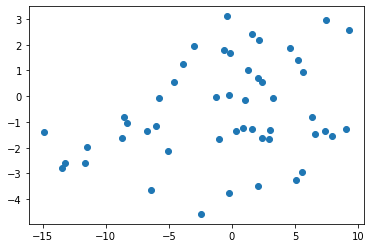

In [114]:
plt.scatter(Train["spy"],Train["PredictedY"])

In [115]:
def adjustedMetric(data,model,model_k,yname):
    data["yhat"]=model.predict(data)
    SST=((data[yname]-data[yname].mean())**2).sum()
    SSR=((data["yhat"]-data[yname].mean())**2).sum()
    SSE=((data[yname]-data["yhat"])**2).sum()
    r2 = SSR/SST
    adjustR2 = 1 -(1-r2)*(data.shape[0]-1)/(data.shape[0]-model_k -1)
    RMSE = (SSE/(data.shape[0] - model_k -1))**0.5
    return adjustR2, RMSE

In [116]:
print("Adjusted R2 and RMSE on Train: ", adjustedMetric(Train,lm,9,"spy"))
print("Adjusted R2 and RMSE on Test: ", adjustedMetric(Test,lm,9,"spy"))

Adjusted R2 and RMSE on Train:  (-0.10994062884414024, 6.5653821268401105)
Adjusted R2 and RMSE on Test:  (0.060512404025451993, 6.859582333279609)


C:\Users\User\AppData\Local\Temp\ipykernel_16152\1614176781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["yhat"]=model.predict(data)
C:\Users\User\AppData\Local\Temp\ipykernel_16152\1614176781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["yhat"]=model.predict(data)


In [117]:
def assessTable(test,train,model,model_k,yname):
    r2test,RMSEtest=adjustedMetric(test,model,model_k,yname)
    r2train,RMSEtrain=adjustedMetric(train,model,model_k,yname)
    assessment=pd.DataFrame(index=["R2","RMSE"],columns=["Train","Test"])
    assessment["Train"] = [r2train,RMSEtrain]
    assessment["Test"] = [r2test,RMSEtest]
    return assessment


In [118]:
assessTable(Test,Train,lm,9,"spy")

C:\Users\User\AppData\Local\Temp\ipykernel_16152\1614176781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["yhat"]=model.predict(data)
C:\Users\User\AppData\Local\Temp\ipykernel_16152\1614176781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["yhat"]=model.predict(data)


,Train,Test
R2,-0.109941,0.060512
RMSE,6.565382,6.859582


In [119]:
Train["Order"] = [1 if sig>0 else -1 for sig in Train["PredictedY"]]
Train["Profit"] = Train["spy"]*Train["Order"]
Train["Wealth"] = Train["Profit"].cumsum()
print("Total Profit made in train: ", Train["Profit"].sum())

Total Profit made in train:  88.79983500000009


C:\Users\User\AppData\Local\Temp\ipykernel_16152\1708323688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train["Order"] = [1 if sig>0 else -1 for sig in Train["PredictedY"]]
C:\Users\User\AppData\Local\Temp\ipykernel_16152\1708323688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train["Profit"] = Train["spy"]*Train["Order"]
C:\Users\User\AppData\Local\Temp\ipykernel_16152\1708323688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [121]:
Test["Order"] = [1 if sig>0 else -1 for sig in Test["PredictedY"]]
Test["Profit"] = Test["spy"]*Test["Order"]
Test["Wealth"] = Test["Profit"].cumsum()
print("Total Profit made in Test: ", Test["Profit"].sum())

Total Profit made in Test:  72.82006999999993


C:\Users\User\AppData\Local\Temp\ipykernel_16152\1556430366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test["Order"] = [1 if sig>0 else -1 for sig in Test["PredictedY"]]
C:\Users\User\AppData\Local\Temp\ipykernel_16152\1556430366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test["Profit"] = Test["spy"]*Test["Order"]
C:\Users\User\AppData\Local\Temp\ipykernel_16152\1556430366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [122]:
Train["Wealth"] = Train["Wealth"]+Train.loc[Train.index[0],"Price"]
Test["Wealth"] = Test["Wealth"]+Test.loc[Test.index[0],"Price"]

C:\Users\User\AppData\Local\Temp\ipykernel_16152\4038973637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train["Wealth"] = Train["Wealth"]+Train.loc[Train.index[0],"Price"]
C:\Users\User\AppData\Local\Temp\ipykernel_16152\4038973637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test["Wealth"] = Test["Wealth"]+Test.loc[Test.index[0],"Price"]


In [123]:
Train["Return"] = np.log(Train["Wealth"])-np.log(Train["Wealth"].shift(1))
dailyr = Train["Return"].dropna()

print("daily sharpe ratio is ", dailyr.mean()/dailyr.std(ddof=1))
print("yearly sharpe ratio is ", (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

daily sharpe ratio is  0.27770484710109516
yearly sharpe ratio is  4.408427779840285


C:\Users\User\AppData\Local\Temp\ipykernel_16152\2711817700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train["Return"] = np.log(Train["Wealth"])-np.log(Train["Wealth"].shift(1))


In [124]:
Test["Return"] = np.log(Test["Wealth"])-np.log(Test["Wealth"].shift(1))
dailyr = Test["Return"].dropna()

print("daily sharpe ratio is ", dailyr.mean()/dailyr.std(ddof=1))
print("yearly sharpe ratio is ", (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

daily sharpe ratio is  0.09298334926808935
yearly sharpe ratio is  1.476064909399345


C:\Users\User\AppData\Local\Temp\ipykernel_16152\196663803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test["Return"] = np.log(Test["Wealth"])-np.log(Test["Wealth"].shift(1))


In [125]:
Train["Peak"] = Train["Wealth"].cummax()
Train["Drawdown"] = (Train["Peak"]-Train["Wealth"])/Train["Peak"]

Test["Peak"] = Test["Wealth"].cummax()
Test["Drawdown"] = (Test["Peak"]-Test["Wealth"])/Test["Peak"]

print("Maximum drawdown in train is ", Train["Drawdown"].max())
print("Maximum drawdown in Test is ", Test["Drawdown"].max())

Maximum drawdown in train is  0.03843592791259967
Maximum drawdown in Test is  0.1404987147017051


C:\Users\User\AppData\Local\Temp\ipykernel_16152\587355973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train["Peak"] = Train["Wealth"].cummax()
C:\Users\User\AppData\Local\Temp\ipykernel_16152\587355973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train["Drawdown"] = (Train["Peak"]-Train["Wealth"])/Train["Peak"]
C:\Users\User\AppData\Local\Temp\ipykernel_16152\587355973.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer